In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### Carga de datos

In [61]:
# Los encabezados se encuentran en el índice 10.
url = 'https://www.policia.gov.co/sites/default/files/delitos-impacto/Homicidio%20Intencional_2.xlsx'
df = pd.read_excel(url, header=10)
display(df.head())

,ARMAS MEDIOS,DEPARTAMENTO,MUNICIPIO,FECHA HECHO,GENERO,*AGRUPA EDAD PERSONA*,CODIGO DANE,CANTIDAD
0,ARMA BLANCA / CORTOPUNZANTE,CUNDINAMARCA,Bogotá D.C. (CT),01/01/2025,MASCULINO,ADULTOS,11001000.0,1.0
1,ARMA BLANCA / CORTOPUNZANTE,CUNDINAMARCA,Bogotá D.C. (CT),01/01/2025,MASCULINO,ADULTOS,11001000.0,1.0
2,ARMA BLANCA / CORTOPUNZANTE,CUNDINAMARCA,Bogotá D.C. (CT),01/01/2025,MASCULINO,ADULTOS,11001000.0,1.0
3,ARMA BLANCA / CORTOPUNZANTE,CUNDINAMARCA,Bogotá D.C. (CT),01/01/2025,MASCULINO,ADULTOS,11001000.0,1.0
4,ARMA BLANCA / CORTOPUNZANTE,RISARALDA,Pereira (CT),01/01/2025,MASCULINO,ADULTOS,66001000.0,1.0


In [ ]:
display(df.tail(6))

,ARMAS MEDIOS,DEPARTAMENTO,MUNICIPIO,FECHA HECHO,GENERO,*AGRUPA EDAD PERSONA*,CODIGO DANE,CANTIDAD
7795,DRON / EXPLOSIVO,NORTE DE SANTANDER,El Carmen,20/07/2025,MASCULINO,ADULTOS,54245000.0,1.0
7796,FUENTE: DIJIN-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7797,*Agrupación referente a la clasificación del c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7798,Elaboró: SI IVAN MATEUS LARA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7799,Revisó: SI IVAN MATEUS LARA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7800,Autorizó: MY MIGUEL ANTONIO CIPAGAUTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Las últimas cinco filas contienen datos de los responsables.

df = df.iloc[:-5]
display(df.tail())

,ARMAS MEDIOS,DEPARTAMENTO,MUNICIPIO,FECHA HECHO,GENERO,*AGRUPA EDAD PERSONA*,CODIGO DANE,CANTIDAD
7791,DRON / EXPLOSIVO,BOLÍVAR,Santa Rosa del Sur,18/06/2025,MASCULINO,ADULTOS,13688000.0,1.0
7792,DRON / EXPLOSIVO,BOLÍVAR,Santa Rosa del Sur,19/06/2025,MASCULINO,ADULTOS,13688000.0,1.0
7793,DRON / EXPLOSIVO,NORTE DE SANTANDER,El Carmen,20/07/2025,MASCULINO,ADULTOS,54245000.0,1.0
7794,DRON / EXPLOSIVO,NORTE DE SANTANDER,El Carmen,20/07/2025,MASCULINO,ADULTOS,54245000.0,1.0
7795,DRON / EXPLOSIVO,NORTE DE SANTANDER,El Carmen,20/07/2025,MASCULINO,ADULTOS,54245000.0,1.0


### Atributos de la base

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7796 entries, 0 to 7795
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ARMAS MEDIOS           7796 non-null   object 
 1   DEPARTAMENTO           7796 non-null   object 
 2   MUNICIPIO              7796 non-null   object 
 3   FECHA HECHO            7796 non-null   object 
 4   GENERO                 7796 non-null   object 
 5   *AGRUPA EDAD PERSONA*  7796 non-null   object 
 6   CODIGO DANE            7796 non-null   float64
 7   CANTIDAD               7796 non-null   float64
dtypes: float64(2), object(6)
memory usage: 487.4+ KB


### Valores faltantes

In [ ]:
missing_values = df.isnull().sum()
print("Cantidad de valores faltantes por columna:")
print(missing_values)

Cantidad de valores faltantes por columna:
ARMAS MEDIOS             0
DEPARTAMENTO             0
MUNICIPIO                0
FECHA HECHO              0
GENERO                   0
*AGRUPA EDAD PERSONA*    0
CODIGO DANE              0
CANTIDAD                 0
dtype: int64


### Valores únicos

In [ ]:
df['ARMAS MEDIOS'].unique()

array(['ARMA BLANCA / CORTOPUNZANTE', 'ARMA DE FUEGO',
       'ARTEFACTO EXPLOSIVO/CARGA DINAMITA', 'CONTUNDENTES',
       'DRON / EXPLOSIVO'], dtype=object)

In [ ]:
df['DEPARTAMENTO'].unique()

array(['CUNDINAMARCA', 'RISARALDA', 'BOLÍVAR', 'SANTANDER', 'CAUCA',
       'ATLÁNTICO', 'HUILA', 'CASANARE', 'CAQUETÁ', 'VALLE', 'ANTIOQUIA',
       'CESAR', 'META', 'TOLIMA', 'CHOCÓ', 'QUINDÍO', 'NARIÑO', 'SUCRE',
       'CALDAS', 'PUTUMAYO', 'MAGDALENA', 'GUAJIRA', 'NORTE DE SANTANDER',
       'CÓRDOBA', 'ARAUCA', 'BOYACÁ', 'AMAZONAS', 'VICHADA', 'SAN ANDRÉS',
       'GUAINÍA', 'VAUPÉS', 'GUAVIARE'], dtype=object)

No figura Bogotá como una jurisdicción independiente.

In [ ]:
df['MUNICIPIO'].unique()

array(['Bogotá D.C. (CT)', 'Pereira (CT)', 'Cartagena (CT)',
       'Sabana de Torres', 'Popayán (CT)', 'Barranquilla (CT)',
       'Neiva (CT)', 'Villanueva', 'Garzón', 'Norosí', 'Rionegro',
       'Florencia (CT)', 'Palmira', 'El Cerrito', 'Tona', 'Zaragoza',
       'Chimichagua', 'Puerto Lleras', 'Envigado', 'Cartagena del Chairá',
       'Betulia', 'Medellín (CT)', 'Ibagué (CT)', 'Palmar de Varela',
       'Cértegui', 'Bucaramanga (CT)', 'Málaga', 'Armenia (CT)',
       'La Ceja', 'Pasto (CT)', 'Floridablanca', 'Taminango', 'Florida',
       'Cali (CT)', 'Aguachica', 'Sincelejo (CT)', 'La Plata',
       'Marinilla', 'Guaduas', 'Cajicá', 'Albania', 'Funza', 'Soledad',
       'Sibaté', 'Soacha', 'Manizales (CT)', 'Caicedonia', 'Ipiales',
       'Los Santos', 'Yumbo', 'Barbosa', 'Ciudad Bolívar', 'San Pablo',
       'Salgar', 'Mocoa (CT)', 'Santa Marta (CT)', 'San Pedro',
       'Alvarado', 'Agustín Codazzi', 'Turbaco', 'Riohacha (CT)',
       'Yarumal', 'El Carmen de Viboral', 'Piede

In [ ]:
df['MUNICIPIO'].nunique()

680

In [ ]:
df['CODIGO DANE'].nunique()

813

In [ ]:
df['GENERO'].unique()

array(['MASCULINO', 'FEMENINO'], dtype=object)

In [ ]:
df["*AGRUPA EDAD PERSONA*"].unique()

array(['ADULTOS', 'ADOLESCENTES', 'MENORES'], dtype=object)

In [ ]:
# La variable numérica "cantidad".
df['CANTIDAD'].describe()


,CANTIDAD
count,7796.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


Se trata de un conteo: su valor máximo es uno; su mínimo, uno.

In [ ]:
suma_por_municipio = df.groupby('MUNICIPIO')['CANTIDAD'].sum()
print(suma_por_municipio)

MUNICIPIO
Abejorral         3.0
Abrego            8.0
Acacías           9.0
Acandí            1.0
Acevedo           6.0
                 ... 
Zaragoza          6.0
Zarzal           18.0
Zipacón           1.0
Zipaquirá         4.0
Zona Bananera    53.0
Name: CANTIDAD, Length: 680, dtype: float64


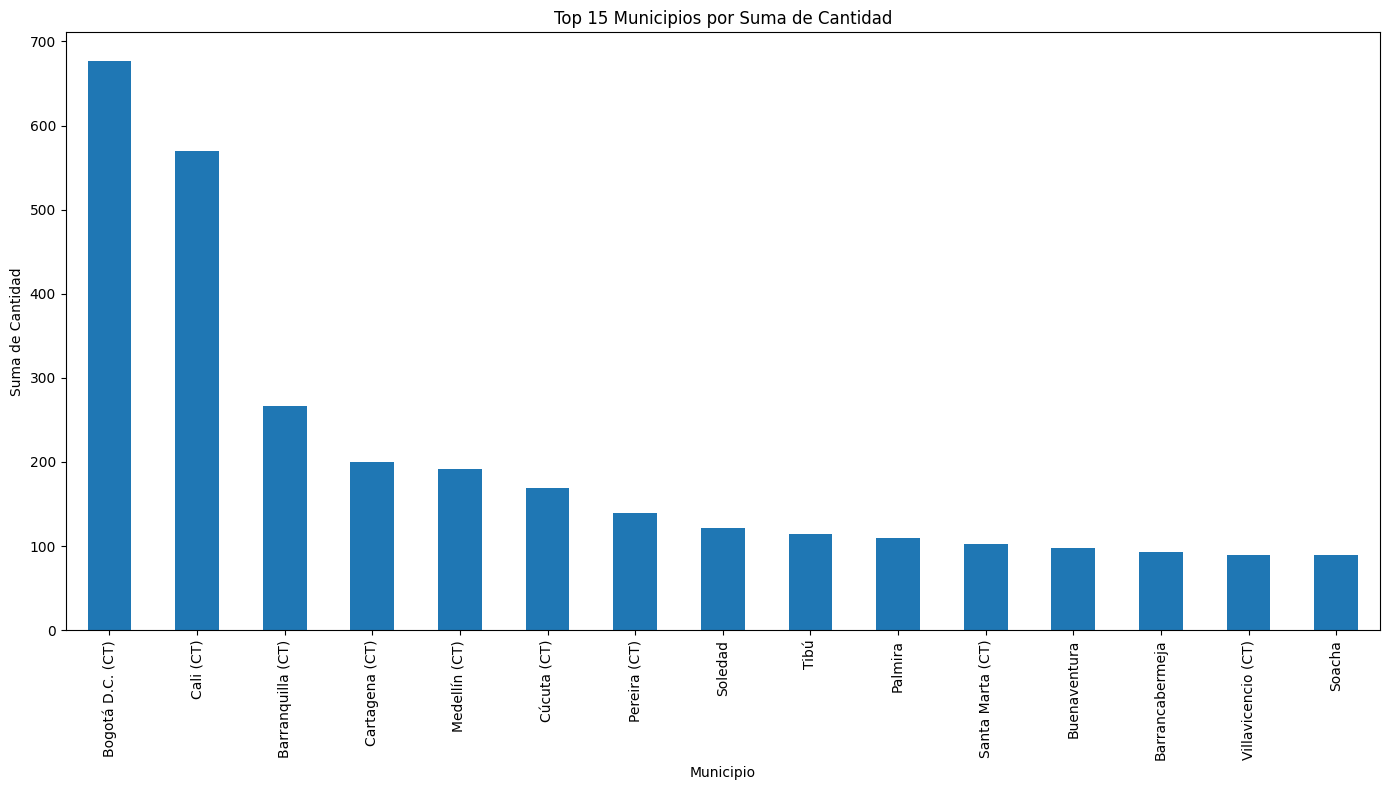

In [ ]:
# Ordenar los datos y seleccionar los 15 municipios con las sumas más altas
suma_por_municipio_sorted = suma_por_municipio.sort_values(ascending=False).head(15)

plt.figure(figsize=(14, 8))
suma_por_municipio_sorted.plot(kind='bar')
plt.title('Top 15 Municipios por Suma de Cantidad')
plt.xlabel('Municipio')
plt.ylabel('Suma de Cantidad')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
suma_por_departamento = df.groupby('DEPARTAMENTO')['CANTIDAD'].sum()
print(suma_por_departamento)

DEPARTAMENTO
AMAZONAS                11.0
ANTIOQUIA              997.0
ARAUCA                  56.0
ATLÁNTICO              504.0
BOLÍVAR                385.0
BOYACÁ                  39.0
CALDAS                  79.0
CAQUETÁ                 64.0
CASANARE                56.0
CAUCA                  441.0
CESAR                  196.0
CHOCÓ                  115.0
CUNDINAMARCA           911.0
CÓRDOBA                 96.0
GUAINÍA                  1.0
GUAJIRA                126.0
GUAVIARE                43.0
HUILA                  207.0
MAGDALENA              364.0
META                   183.0
NARIÑO                 153.0
NORTE DE SANTANDER     466.0
PUTUMAYO                47.0
QUINDÍO                106.0
RISARALDA              241.0
SAN ANDRÉS              17.0
SANTANDER              281.0
SUCRE                  102.0
TOLIMA                 157.0
VALLE                 1344.0
VAUPÉS                   2.0
VICHADA                  6.0
Name: CANTIDAD, dtype: float64


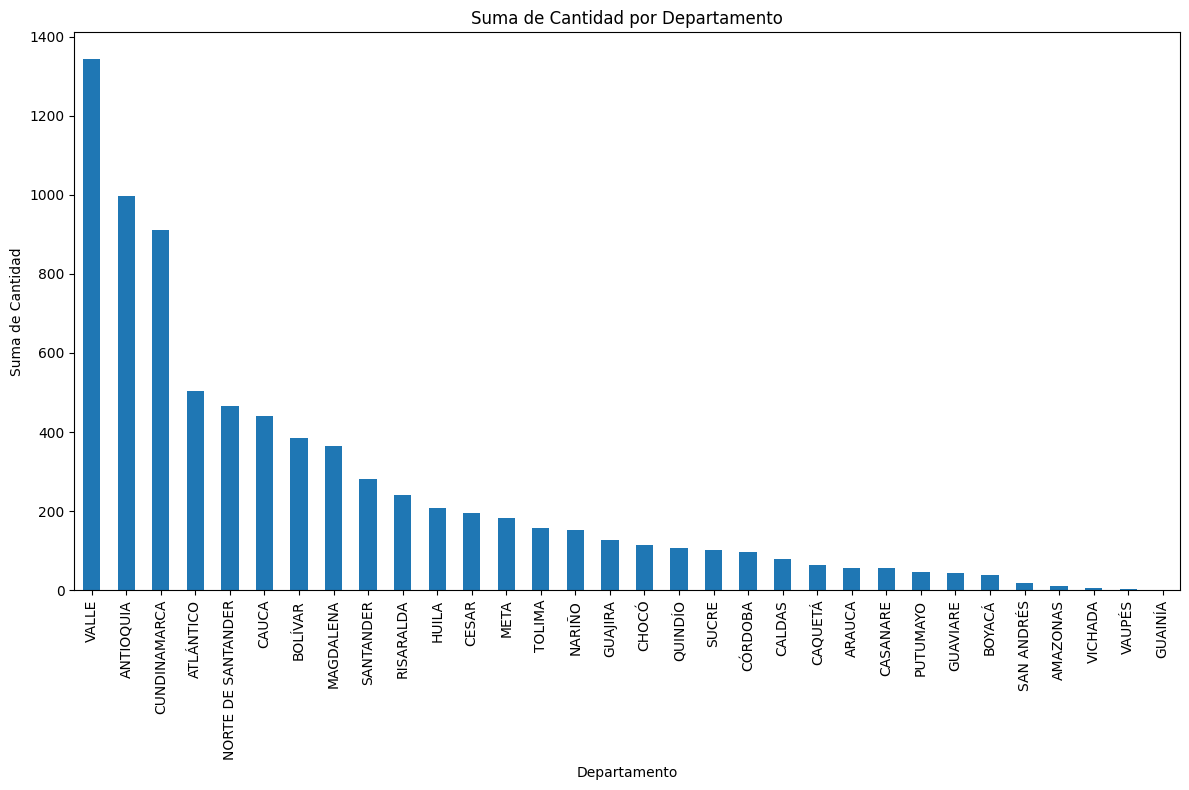

In [ ]:
import matplotlib.pyplot as plt

# Ordenar los datos para una mejor visualización
suma_por_departamento_sorted = suma_por_departamento.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
ax = suma_por_departamento_sorted.plot(kind='bar')
plt.title('Suma de Cantidad por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Suma de Cantidad')
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

In [ ]:
suma_por_medios = df.groupby('ARMAS MEDIOS')['CANTIDAD'].sum()
print(suma_por_medios)

ARMAS MEDIOS
ARMA BLANCA / CORTOPUNZANTE           1179.0
ARMA DE FUEGO                         6227.0
ARTEFACTO EXPLOSIVO/CARGA DINAMITA      71.0
CONTUNDENTES                           308.0
DRON / EXPLOSIVO                        11.0
Name: CANTIDAD, dtype: float64


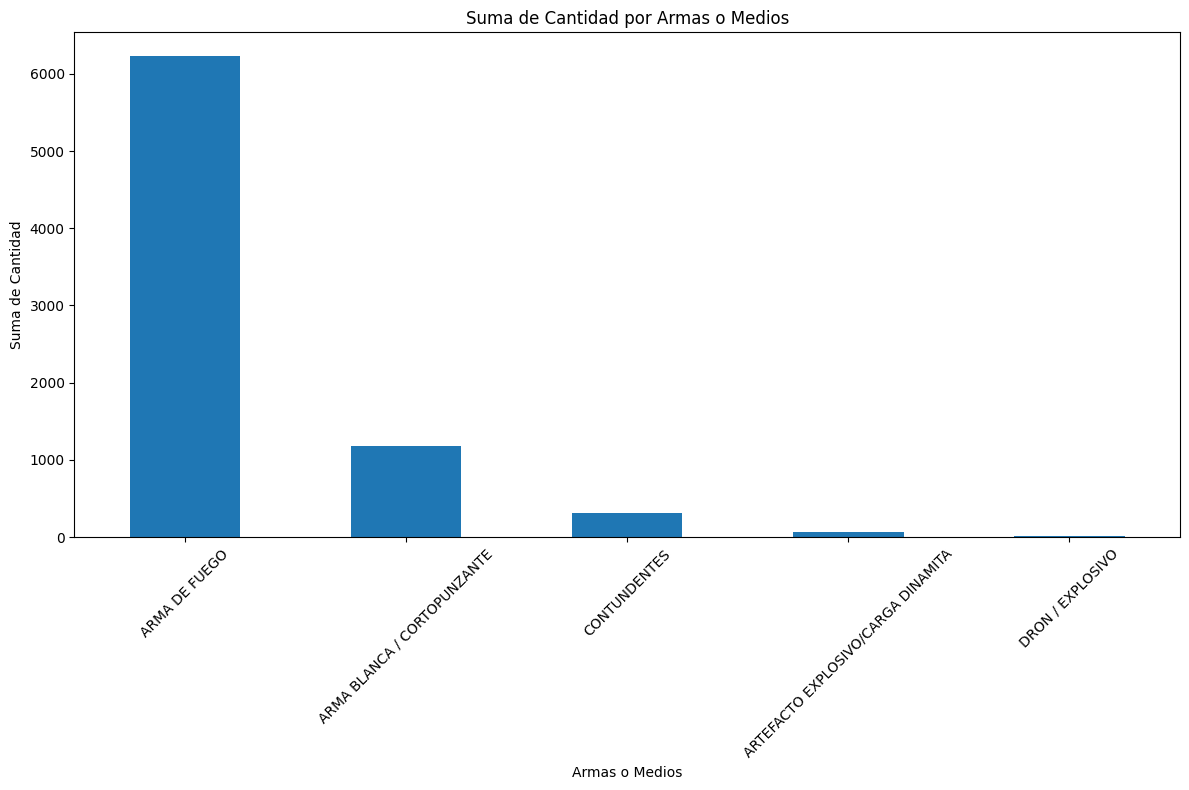

In [ ]:
# Ordenar los datos para una mejor visualización
suma_por_medios_sorted = suma_por_medios.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
ax = suma_por_medios_sorted.plot(kind='bar')
plt.title('Suma de Cantidad por Armas o Medios')
plt.xlabel('Armas o Medios')
plt.ylabel('Suma de Cantidad')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

# Divipola

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
file_path = '/content/drive/MyDrive/Consultoria/proyecto_observatorio/DIVIPOLA-_Códigos_municipios_20250904.csv'
df_divipola = pd.read_csv(file_path)

In [ ]:
display(df_divipola.head(10))

,Código Departamento,Nombre Departamento,Código Municipio,Nombre Municipio,Tipo: Municipio / Isla / Área no municipalizada,longitud,Latitud
0,5,ANTIOQUIA,5001,MEDELLÍN,Municipio,"-75,581775","6,246631"
1,5,ANTIOQUIA,5002,ABEJORRAL,Municipio,"-75,428739","5,789315"
2,5,ANTIOQUIA,5004,ABRIAQUÍ,Municipio,"-76,064304","6,632282"
3,5,ANTIOQUIA,5021,ALEJANDRÍA,Municipio,"-75,141346","6,376061"
4,5,ANTIOQUIA,5030,AMAGÁ,Municipio,"-75,702188","6,038708"
5,5,ANTIOQUIA,5031,AMALFI,Municipio,"-75,077501","6,909655"
6,5,ANTIOQUIA,5034,ANDES,Municipio,"-75,878828","5,657194"
7,5,ANTIOQUIA,5036,ANGELÓPOLIS,Municipio,"-75,711389","6,109719"
8,5,ANTIOQUIA,5038,ANGOSTURA,Municipio,"-75,335116","6,885175"
9,5,ANTIOQUIA,5040,ANORÍ,Municipio,"-75,148355","7,074703"


In [ ]:
df_divipola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Código Departamento                              1122 non-null   int64 
 1   Nombre Departamento                              1122 non-null   object
 2   Código Municipio                                 1122 non-null   int64 
 3   Nombre Municipio                                 1122 non-null   object
 4   Tipo: Municipio / Isla / Área no municipalizada  1122 non-null   object
 5   longitud                                         1122 non-null   object
 6   Latitud                                          1122 non-null   object
dtypes: int64(2), object(5)
memory usage: 61.5+ KB


Nombre Departamento: object

Nombre Municipio: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7796 entries, 0 to 7795
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ARMAS MEDIOS           7796 non-null   object 
 1   DEPARTAMENTO           7796 non-null   object 
 2   MUNICIPIO              7796 non-null   object 
 3   FECHA HECHO            7796 non-null   object 
 4   GENERO                 7796 non-null   object 
 5   *AGRUPA EDAD PERSONA*  7796 non-null   object 
 6   CODIGO DANE            7796 non-null   float64
 7   CANTIDAD               7796 non-null   float64
dtypes: float64(2), object(6)
memory usage: 487.4+ KB


DEPARTAMENTO: object

MUNICIPIO: object

In [ ]:
df.head(10)

,ARMAS MEDIOS,DEPARTAMENTO,MUNICIPIO,FECHA HECHO,GENERO,*AGRUPA EDAD PERSONA*,CODIGO DANE,CANTIDAD
0,ARMA BLANCA / CORTOPUNZANTE,CUNDINAMARCA,Bogotá D.C. (CT),01/01/2025,MASCULINO,ADULTOS,11001000.0,1.0
1,ARMA BLANCA / CORTOPUNZANTE,CUNDINAMARCA,Bogotá D.C. (CT),01/01/2025,MASCULINO,ADULTOS,11001000.0,1.0
2,ARMA BLANCA / CORTOPUNZANTE,CUNDINAMARCA,Bogotá D.C. (CT),01/01/2025,MASCULINO,ADULTOS,11001000.0,1.0
3,ARMA BLANCA / CORTOPUNZANTE,CUNDINAMARCA,Bogotá D.C. (CT),01/01/2025,MASCULINO,ADULTOS,11001000.0,1.0
4,ARMA BLANCA / CORTOPUNZANTE,RISARALDA,Pereira (CT),01/01/2025,MASCULINO,ADULTOS,66001000.0,1.0
5,ARMA BLANCA / CORTOPUNZANTE,BOLÍVAR,Cartagena (CT),01/01/2025,MASCULINO,ADULTOS,13001000.0,1.0
6,ARMA BLANCA / CORTOPUNZANTE,SANTANDER,Sabana de Torres,01/01/2025,MASCULINO,ADULTOS,68655000.0,1.0
7,ARMA BLANCA / CORTOPUNZANTE,CAUCA,Popayán (CT),01/01/2025,MASCULINO,ADULTOS,19001000.0,1.0
8,ARMA BLANCA / CORTOPUNZANTE,ATLÁNTICO,Barranquilla (CT),01/01/2025,MASCULINO,ADULTOS,8001000.0,1.0
9,ARMA BLANCA / CORTOPUNZANTE,HUILA,Neiva (CT),01/01/2025,MASCULINO,ADULTOS,41001000.0,1.0


In [ ]:
# Para hacer homogéneas las bases, es necesario omitir la indicación (CT) de la
# base df y volver todas las denominaciones a mayúscula sostenida.
df['MUNICIPIO'] = df['MUNICIPIO'].str.replace(r' \(CT\)', '', regex=True).str.upper()
display(df['MUNICIPIO'].head())

,MUNICIPIO
0,BOGOTÁ D.C.
1,BOGOTÁ D.C.
2,BOGOTÁ D.C.
3,BOGOTÁ D.C.
4,PEREIRA


In [ ]:
# "right merge" para asegurarme de que todos los municipios del DataFrame df_divipola estén incluidos en el resultado.
df_merged = pd.merge(df, df_divipola, left_on='MUNICIPIO', right_on='Nombre Municipio', how='right')
display(df_merged.head())

,ARMAS MEDIOS,DEPARTAMENTO,MUNICIPIO,FECHA HECHO,GENERO,*AGRUPA EDAD PERSONA*,CODIGO DANE,CANTIDAD,Código Departamento,Nombre Departamento,Código Municipio,Nombre Municipio,Tipo: Municipio / Isla / Área no municipalizada,longitud,Latitud
0,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,MEDELLÍN,01/01/2025,MASCULINO,ADULTOS,5001000.0,1.0,5,ANTIOQUIA,5001,MEDELLÍN,Municipio,"-75,581775","6,246631"
1,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,MEDELLÍN,09/01/2025,MASCULINO,ADULTOS,5001000.0,1.0,5,ANTIOQUIA,5001,MEDELLÍN,Municipio,"-75,581775","6,246631"
2,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,MEDELLÍN,12/01/2025,MASCULINO,ADULTOS,5001000.0,1.0,5,ANTIOQUIA,5001,MEDELLÍN,Municipio,"-75,581775","6,246631"
3,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,MEDELLÍN,13/01/2025,FEMENINO,ADULTOS,5001000.0,1.0,5,ANTIOQUIA,5001,MEDELLÍN,Municipio,"-75,581775","6,246631"
4,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,MEDELLÍN,16/01/2025,MASCULINO,ADULTOS,5001000.0,1.0,5,ANTIOQUIA,5001,MEDELLÍN,Municipio,"-75,581775","6,246631"


In [58]:
missing_values_merged = df_merged.isnull().sum()
print("Cantidad de valores faltantes por columna en el DataFrame combinado:")
print(missing_values_merged)

Cantidad de valores faltantes por columna en el DataFrame combinado:
ARMAS MEDIOS                                       397
DEPARTAMENTO                                       397
MUNICIPIO                                          397
FECHA HECHO                                        397
GENERO                                             397
*AGRUPA EDAD PERSONA*                              397
CODIGO DANE                                        397
CANTIDAD                                           397
Código Departamento                                  0
Nombre Departamento                                  0
Código Municipio                                     0
Nombre Municipio                                     0
Tipo: Municipio / Isla / Área no municipalizada      0
longitud                                             0
Latitud                                              0
dtype: int64


Los datos faltantes reflejan que los homicidios reportados no tuvieron lugar en 397 municipios, lo que tiene sentido.

Lo anterior indica que las bases se unieron de manera exitosa.

# Añadir características poblacionales a la base consolidada

In [76]:
# Cargar una hoja específica de un archivo Excel
df_poblacion = pd.read_excel('/content/PPED-AreaMun-2018-2042_VP.xlsx', sheet_name='PobMunicipalxÁrea', header=7)
df_poblacion.head()

,DP,DPNOM,MPIO,DPMP,AÑO,ÁREA GEOGRÁFICA,TOTAL
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,05,Antioquia,5001.0,Medellín,2018.0,Cabecera Municipal,2382405.0
2,05,Antioquia,5001.0,Medellín,2018.0,Centros Poblados y Rural Disperso,44728.0
3,05,Antioquia,5001.0,Medellín,2018.0,Total,2427133.0
4,05,Antioquia,5002.0,Abejorral,2018.0,Cabecera Municipal,7669.0


In [81]:
df_poblacion_filtrado = df_poblacion[(df_poblacion['ÁREA GEOGRÁFICA'] == 'Total') & (df_poblacion['AÑO'] == 2025.0)].copy()
df_poblacion_filtrado.loc[:, 'DPNOM'] = df_poblacion_filtrado['DPNOM'].str.upper()
df_poblacion_filtrado.loc[:, 'DPMP'] = df_poblacion_filtrado['DPMP'].str.upper()
display(df_poblacion_filtrado.head())

,DP,DPNOM,MPIO,DPMP,AÑO,ÁREA GEOGRÁFICA,TOTAL
23586,05,ANTIOQUIA,5001.0,MEDELLÍN,2025.0,Total,2528343.0
23589,05,ANTIOQUIA,5002.0,ABEJORRAL,2025.0,Total,21147.0
23592,05,ANTIOQUIA,5004.0,ABRIAQUÍ,2025.0,Total,2807.0
23595,05,ANTIOQUIA,5021.0,ALEJANDRÍA,2025.0,Total,5285.0
23598,05,ANTIOQUIA,5030.0,AMAGÁ,2025.0,Total,32858.0


In [82]:
df_final = pd.merge(df_merged, df_poblacion_filtrado[['DPMP', 'TOTAL']], left_on='MUNICIPIO', right_on='DPMP', how='left')
display(df_final.head())
# merged the dataframes, keeping all the rows from the original homicide data
# and adding the population information where available.

,ARMAS MEDIOS,DEPARTAMENTO,MUNICIPIO,FECHA HECHO,GENERO,*AGRUPA EDAD PERSONA*,CODIGO DANE,CANTIDAD,Código Departamento,Nombre Departamento,Código Municipio,Nombre Municipio,Tipo: Municipio / Isla / Área no municipalizada,longitud,Latitud,DPMP,TOTAL
0,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,MEDELLÍN,01/01/2025,MASCULINO,ADULTOS,5001000.0,1.0,5,ANTIOQUIA,5001,MEDELLÍN,Municipio,"-75,581775","6,246631",MEDELLÍN,2528343.0
1,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,MEDELLÍN,09/01/2025,MASCULINO,ADULTOS,5001000.0,1.0,5,ANTIOQUIA,5001,MEDELLÍN,Municipio,"-75,581775","6,246631",MEDELLÍN,2528343.0
2,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,MEDELLÍN,12/01/2025,MASCULINO,ADULTOS,5001000.0,1.0,5,ANTIOQUIA,5001,MEDELLÍN,Municipio,"-75,581775","6,246631",MEDELLÍN,2528343.0
3,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,MEDELLÍN,13/01/2025,FEMENINO,ADULTOS,5001000.0,1.0,5,ANTIOQUIA,5001,MEDELLÍN,Municipio,"-75,581775","6,246631",MEDELLÍN,2528343.0
4,ARMA BLANCA / CORTOPUNZANTE,ANTIOQUIA,MEDELLÍN,16/01/2025,MASCULINO,ADULTOS,5001000.0,1.0,5,ANTIOQUIA,5001,MEDELLÍN,Municipio,"-75,581775","6,246631",MEDELLÍN,2528343.0


In [83]:
missing_values_final = df_final.isnull().sum()
print("Cantidad de valores faltantes por columna en el DataFrame final:")
print(missing_values_final)

Cantidad de valores faltantes por columna en el DataFrame final:
ARMAS MEDIOS                                       397
DEPARTAMENTO                                       397
MUNICIPIO                                          397
FECHA HECHO                                        397
GENERO                                             397
*AGRUPA EDAD PERSONA*                              397
CODIGO DANE                                        397
CANTIDAD                                           397
Código Departamento                                  0
Nombre Departamento                                  0
Código Municipio                                     0
Nombre Municipio                                     0
Tipo: Municipio / Isla / Área no municipalizada      0
longitud                                             0
Latitud                                              0
DPMP                                               399
TOTAL                                              399


# Informe README

Este informe resume el análisis exploratorio inicial de los datos de homicidios y población para Colombia.

## Pasos Realizados

1.  **Carga de Datos de Homicidios:** Se cargaron los datos de homicidios desde un archivo Excel en un DataFrame de pandas (`df`).
2.  **Limpieza Inicial de Datos de Homicidios:**
    *   Se eliminaron las últimas 5 filas del DataFrame de homicidios que contenían información de responsables.
    *   Se verificó la información general del DataFrame, incluyendo tipos de datos y valores no nulos.
    *   Se comprobó la presencia de valores faltantes (no se encontraron en las columnas relevantes después de la limpieza inicial).
    *   Se exploraron los valores únicos en columnas categóricas como 'ARMAS MEDIOS', 'DEPARTAMENTO', 'MUNICIPIO', 'GENERO', y '*AGRUPA EDAD PERSONA*'.
3.  **Análisis Exploratorio de Homicidios:**
    *   Se calculó la suma de la columna 'CANTIDAD' por municipio y se mostraron los 15 municipios con las sumas más altas en un gráfico de barras.
    *   Se calculó la suma de la columna 'CANTIDAD' por departamento y se mostraron los resultados en un gráfico de barras.
    *   Se calculó la suma de la columna 'CANTIDAD' por tipo de arma o medio utilizado y se mostraron los resultados en un gráfico de barras.
4.  **Carga de Datos de DIVIPOLA:** Se cargaron los datos de DIVIPOLA desde un archivo CSV en un DataFrame de pandas (`df_divipola`).
5.  **Homogeneización de Nombres de Municipios:** Se eliminó la indicación '(CT)' y se convirtieron los nombres de los municipios en el DataFrame de homicidios a mayúscula sostenida para facilitar la unión con otros datos.
6.  **Carga de Datos de Población:** Se cargaron los datos de población desde un archivo Excel en un DataFrame de pandas (`df_poblacion`).
7.  **Filtrado y Preparación de Datos de Población:** Se filtró el DataFrame de población para incluir solo los registros correspondientes al 'Total' del 'ÁREA GEOGRÁFICA' en el año 2025. Además, se convirtieron los nombres de departamentos y municipios a mayúscula sostenida.
8.  **Unión de DataFrames:** Se realizó una unión (merge) entre el DataFrame de homicidios (`df_merged`, que ya contenía información de DIVIPOLA) y el DataFrame de población filtrado (`df_poblacion_filtrado`). Se utilizó un 'left merge' basado en el nombre del municipio para mantener todos los registros de homicidios y añadir la población correspondiente donde estuviera disponible.
9.  **Verificación de Valores Faltantes en el DataFrame Combinado:** Se comprobó la cantidad de valores faltantes en el DataFrame resultante (`df_final`) para entender cuántos registros de homicidios no pudieron ser asociados con datos de población.

## Próximos Pasos Sugeridos

*   Calcular la tasa de homicidios por cada 100,000 habitantes utilizando los datos de homicidios y la población.
*   Explorar la distribución geográfica de la tasa de homicidios.
*   Analizar las tendencias temporales de los homicidios.
*   Investigar la relación entre el tipo de arma/medio y la cantidad de homicidios.
*   Realizar análisis por género y grupo de edad.